In [17]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd 
from scipy.signal import savgol_filter

# Current Density - Overpotential Plot for Bard 3.1

In [18]:
#Constants
j0 = 0.00965
alphaa = 0.3
alphac = 0.7
R = 8.314
T = 298 
F = 96485
n = 1
EEq = 0.771
z = 1
jmax = 600
A = 1 
CO1 = 1 
CR1 = 1 
kTO = 10**(-7)


def ExchangeCurrent(alpha, k, CO, CR):
     return n * F * A * CO**(1-alpha) * CR**(alpha) * k 

EC = ExchangeCurrent(alphaa, kTO, CO1, CR1)
#Finding Voltage Boundaries
etamax  = (R*T)/(alphaa*z*F)*np.log(jmax/j0)
Eta = np.linspace(-(etamax), etamax, 500)

#Equations for the curves
def CurrentDensityA(Eta):
    return j0 * np.exp((1-alphaa)*z*F*Eta/(R*T))

def CurrentDensityC(Eta):
    return (-j0 * np.exp(-alphaa*z*F*Eta/(R*T)))

CurrentDensitya = CurrentDensityA(Eta)
CurrentDensityc = CurrentDensityC(Eta)
np.log10(EC)


-2.015540198817688

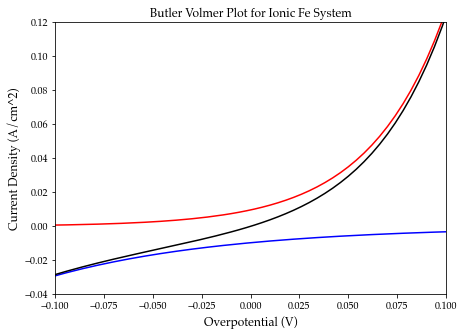

In [19]:
#Plotting for Current Density-Overpotential

fig = plt.figure(figsize = (7,5))

#Axis limits
#plt.xlim(min(Eta),max(Eta))
# plt.ylim(-600,600)
# plt.xlim(-10,10)
# plt.xlim(-1,1)
plt.xlim(-.1,.1)
plt.ylim(-.04,.12)


plt.plot(Eta/max(Eta),CurrentDensitya, color = 'red')
plt.plot(Eta/max(Eta),CurrentDensityc, color = 'blue')
plt.plot(Eta/max(Eta),CurrentDensitya+CurrentDensityc, color = 'black')

#Font selection
matplotlib.rcParams['font.serif'] = "Palatino"
matplotlib.rcParams['font.family'] = "serif"

#Plot Labeling
plt.title('Butler Volmer Plot for Ionic Fe System')
plt.xlabel('Overpotential (V)', fontsize = '12')
plt.ylabel('Current Density (A/cm^2)', fontsize = '12')

fig.savefig('BV.png', format='png', dpi=1200)



## Tafel Plots

In [20]:

#Deriving log of current density
CurrentDensityTotal = CurrentDensitya+CurrentDensityc
logja = np.log10(abs(CurrentDensitya))
TafelCurrentDensityc = abs(CurrentDensityc)
logjc = np.log10(TafelCurrentDensityc)



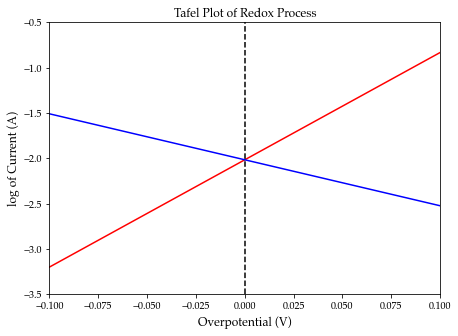

In [21]:
#Plotting for Tafel Plot

fig = plt.figure(figsize = (7,5))

#Axis limits
#plt.xlim(min(Eta),max(Eta))
#plt.ylim(-600,600)
plt.xlim(-.1,.1)
plt.ylim(-3.5,-0.5)


plt.plot(Eta,logja, color = 'red')
plt.plot(Eta,logjc, color = 'blue')

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k', linestyle =  '--')
#plt.plot(Eta,logja+logjc, color = 'black')

#Font selection
matplotlib.rcParams['font.serif'] = "Palatino"
matplotlib.rcParams['font.family'] = "serif"

#Plot Labeling
plt.title('Tafel Plot of Redox Process')
plt.xlabel('Overpotential (V)', fontsize = '12')
plt.ylabel('log of Current (A)', fontsize = '12')

fig.savefig('Tafel.png', format='png', dpi=1200)

# $\iota \eta$ plots for Bard 3.3


In [22]:
#Constants for 3.3
A = 1
CO2 = 1.0*10**(-3)
CR2 = 1.0*10**(-5)
mO = 0.01
mR = 0.01
n=1
a=0.5
kTT=1.0*10**(-4)
f = F/(R*T)
i0 = ExchangeCurrent(a, kTT, CO2, CR2)

#Find ilc and ila
def iancat(m, C):
    return n * F * m * C

ila = iancat(mR,CR2)
ilc = iancat(mO,CO2)

#Creating the DataFrame full of data
Potential = np.arange(-1.5,0.5,.05)
Overpotential = Potential + 0.5
df = pd.DataFrame({'Potential': Potential, 'Overpotential': Overpotential})
df = df.round(3)

def exp1(Overpotential, a):
    return np.exp(-a * f * Overpotential)

def exp2(Overpotential, a):
    return np.exp((1-a) * f * Overpotential)

def Current(Overpotential, i0, ilc, ila , a):
    return ((exp1(Overpotential, a) - exp2(Overpotential, a))/ ((1/i0) + (exp1(Overpotential, a)/ilc) - (exp2(Overpotential, a)/ila)))



exp1set = exp1(df.Overpotential, a)
df['exp1'] = exp1set
exp2set = exp2(df.Overpotential, a)
df['exp2'] = exp2set
CurrentBT = Current(df.Overpotential, i0, ilc, ila, a)
df['Current'] = CurrentBT
logCurrent = np.log(abs(df['Current']))
df['lnCurrent'] = logCurrent

df = df.round(5)
df = df.drop([22,23,24,25])

# window = 21
# order = 2
# y_sf = savgol_filter(df['Current'], window, order)
dfn = df.drop(['exp1', 'exp2'], axis=1)
dfn


/Users/Michael/opt/miniconda3/envs/emlab/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Potential,Overpotential,Current,lnCurrent
0,-1.50,-1.00,0.96485,-0.03579
1,-1.45,-0.95,0.96484,-0.03579
2,-1.40,-0.90,0.96483,-0.03581
3,-1.35,-0.85,0.96479,-0.03585
4,-1.30,-0.80,0.96468,-0.03595
5,-1.25,-0.75,0.96441,-0.03624
6,-1.20,-0.70,0.96369,-0.03699
7,-1.15,-0.65,0.96179,-0.03896
8,-1.10,-0.60,0.95678,-0.04418
9,-1.05,-0.55,0.94377,-0.05787


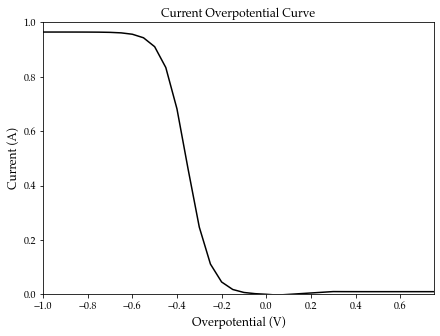

In [23]:
#Plot Current vs Overpotential
fig = plt.figure(figsize = (7,5))

plt.xlim(-1,.75)
plt.ylim(-0.0,1)

plt.plot(df.Overpotential,df.Current, color = 'black')
# plt.plot(df.Overpotential,y_sf, color = 'black')

#Font selection
matplotlib.rcParams['font.serif'] = "Palatino"
matplotlib.rcParams['font.family'] = "serif"

#Plot Labeling
plt.title('Current Overpotential Curve')
plt.xlabel('Overpotential (V)', fontsize = '12')
plt.ylabel('Current (A)', fontsize = '12')

fig.savefig('CDI.png', format='png', dpi=1200)


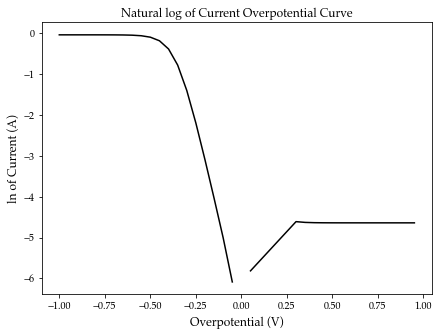

In [24]:
#Plot log of Current vs Overpotential
fig = plt.figure(figsize = (7,5))

# plt.xlim(-1,.5)
# plt.ylim(-0.02,.01)

plt.plot(df.Overpotential,df.lnCurrent, color = 'black')

#Font selection
matplotlib.rcParams['font.serif'] = "Palatino"
matplotlib.rcParams['font.family'] = "serif"

#Plot Labeling
plt.title('Natural log of Current Overpotential Curve')
plt.xlabel('Overpotential (V)', fontsize = '12')
plt.ylabel('ln of Current (A)', fontsize = '12')

fig.savefig('lnCDI.png', format='png', dpi=1200)

### $\iota - \eta $ plots With Various Rate Constants


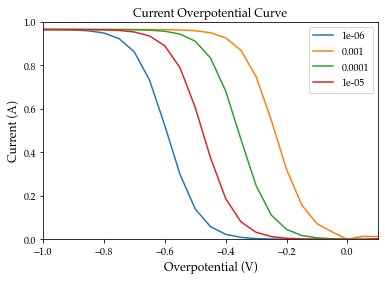

In [25]:
#Generating different k valued exchange current values
kset = np.array([10**(-6),10**(-3),10**(-4),10**(-5)])
kpd = pd.Series(kset).round(8)

ExchangeCurrentSet = ExchangeCurrent(a, kset, CO2, CR2)

fig = plt.subplots()
for i in range(len(ExchangeCurrentSet)):

    plt.xlim(-1,.1)
    plt.ylim(-0.0,1)    

    plt.plot(df.Overpotential,Current(df.Overpotential, ExchangeCurrentSet[i], ilc, ila, a), label = kpd[i])

    #Font selection
    matplotlib.rcParams['font.serif'] = "Palatino"
    matplotlib.rcParams['font.family'] = "serif"

    #Plot Labeling
    plt.title('Current Overpotential Curve')
    plt.xlabel('Overpotential (V)', fontsize = '12')
    plt.ylabel('Current (A)', fontsize = '12')

    plt.legend(loc="upper right")

plt.savefig('CDDifk.png', format='png', dpi=1200)


### $\iota - \eta $ plots With Various Alpha Values

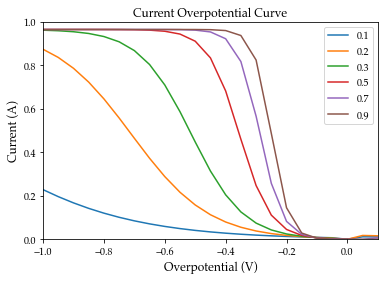

In [26]:
#Generating different k valued exchange current values
aset = np.array([.1,.2,.3, .5,.7,.9])
apd = pd.Series(aset)


ExchangeCurrentSet = ExchangeCurrent(aset, kTT, CO2, CR2)
fig = plt.subplots()
for i in range(len(ExchangeCurrentSet)):

    plt.xlim(-1,.1)
    plt.ylim(-0.0,1) 

    plt.plot(df.Overpotential,Current(df.Overpotential, ExchangeCurrentSet[i], ilc, ila, aset[i]), label = apd[i])

    #Font selection
    matplotlib.rcParams['font.serif'] = "Palatino"
    matplotlib.rcParams['font.family'] = "serif"

    #Plot Labeling
    plt.title('Current Overpotential Curve')
    plt.xlabel('Overpotential (V)', fontsize = '12')
    plt.ylabel('Current (A)', fontsize = '12')

    plt.legend(loc="upper right")

plt.savefig('CDDifa.png', format='png', dpi=1200)


    

# Bard 3.11: Large and small $\eta$ behavior

In [27]:
OverpotentialTE = np.array([-100, -120, -150, -500, -600]) # in mV 
CurrentTE = np.array([45.9, 62.6, 100, 965, 965]) #in microA
logCurrentTE = np.log10(CurrentTE)
ATE = 0.1 #in cm^2
COTE = 10**(-5) #in mol/cm^3

# #Taking slope of the small Overpotential region
x = [OverpotentialTE[0], OverpotentialTE[2]]
y = [logCurrentTE[0], logCurrentTE[2]]
slope, intercept = np.polyfit(x,y,1)

#Value extrapolation from small eta region
ExCurrentTE = 10**intercept
alphaTE = -slope*2.303*R*T/F*1000
RCT = (R*T)/(F*(ExCurrentTE*10**(-6)))
k = (ExCurrentTE*10**(-6)) / (F*ATE*10**(-5))
LimCurrent = 965 #in mV, found from plot
mo = (LimCurrent*10**(-6))/(n*F*ATE*COTE) 
RMT = (R*T)/(F*(LimCurrent*10**(-6)))
mo

# fig = plt.figure(figsize = (7,5))
# plt.plot(OverpotentialTE, logCurrentTE, 'o')

0.010001554645799864